<a href="https://colab.research.google.com/github/ashukesharwani/paper1/blob/main/Before_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://github.com/ashukesharwani/paper1.git

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

# plt.rcParams['figure.figsize']=(10.0,7.0)


In [ ]:
df=pd.read_excel('/content/Crop Datasets.xlsx')
df

,Year,Area,Production,Yield
0,1950-51,30.81,20.58,668
1,1951-52,29.83,21.30,714
2,1952-53,29.97,22.90,764
3,1953-54,31.29,28.21,902
4,1954-55,30.77,25.22,820
...,...,...,...,...
64,2014-15,44.11,105.48,2391
65,2015-16,43.49,104.40,2400
66,2016-17,43.99,109.69,2494
67,2017-18,43.77,112.75,2576


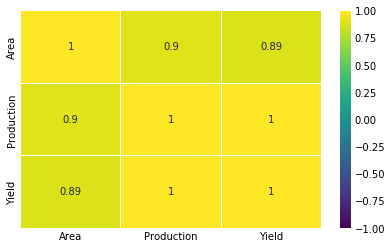

In [ ]:
import seaborn as sns
df_kor = df.corr()
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

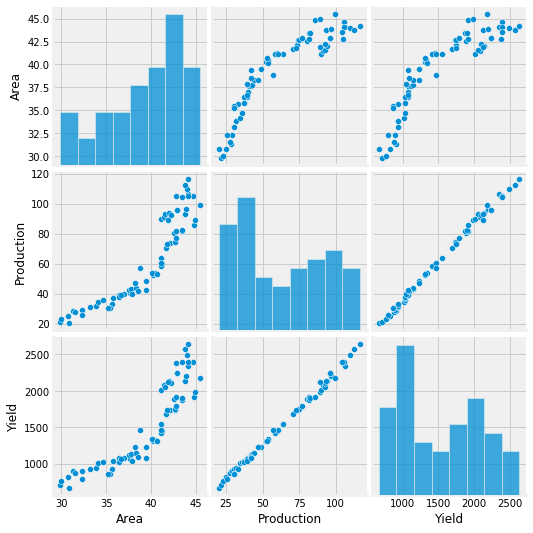

In [ ]:
import seaborn
import matplotlib.pyplot as plt
  
seaborn.pairplot(df)
# to show
plt.show()

In [ ]:
X=df['Area'].values
Y=df['Production'].values
#total number of values
m=len(X)


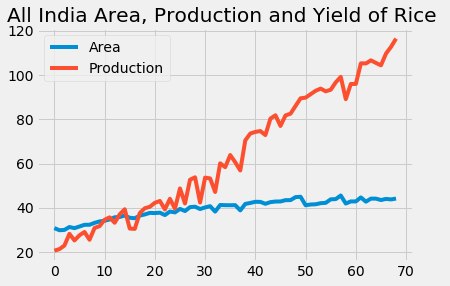

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(X,label="Area")
plt.plot(Y,label="Production")
plt.title("All India Area, Production and Yield of Rice ")
plt.legend()

# **Linear Regression**

In [ ]:
# inbuit function
from sklearn.linear_model import LinearRegression

# cannot use Rank 1 matrix in scikit learn
X=X.reshape((m ,1))


#creating Model
reg=LinearRegression()

#fitting traingin data
reg=reg.fit(X, Y)
print("Y-intercept :"  , reg.intercept_)
print("Slope :" , reg.coef_)
print("\n")


#Y prediction
Y_pred=reg.predict(X)
print("Y_Predicted Values : ")
Y_pred


Y-intercept : -173.0137146699802
Slope : [5.99426992]


Y_Predicted Values : 


array([11.66974168,  5.79535715,  6.63455494, 14.54699124, 11.42997088,
       15.92567332, 20.48131846, 20.60120386, 25.81621869, 29.71249415,
       31.57071782, 34.92750898, 40.9217789 , 41.64109129, 45.53736674,
       39.60303952, 38.28430014, 45.41748134, 48.5944444 , 52.85037605,
       52.31089176, 53.32991764, 46.91604883, 56.5068807 , 54.10917273,
       63.64006191, 57.82562009, 68.43547785, 69.63433184, 63.28040572,
       67.65622276, 71.01301392, 56.32705261, 74.18997698, 73.71043538,
       73.59054999, 73.77037808, 59.62390106, 77.12716924, 79.76464801,
       82.88166837, 82.64189757, 77.42688274, 81.98252788, 83.60098076,
       83.78080886, 87.31742811, 87.43731351, 95.52957791, 96.54860379,
       73.53060729, 75.56865906, 76.16808605, 79.10527832, 80.0643615 ,
       89.59525068, 90.19467767, 99.90539495, 78.20613783, 83.90069425,
       83.90069425, 94.75032282, 83.24132456, 91.51341706, 91.39353166,
       87.67708431, 90.67421927, 89.35547988, 91.63330246])

Text(0.5, 1.0, 'Simple Linear Regression line Before Box-Cox Transformation ')

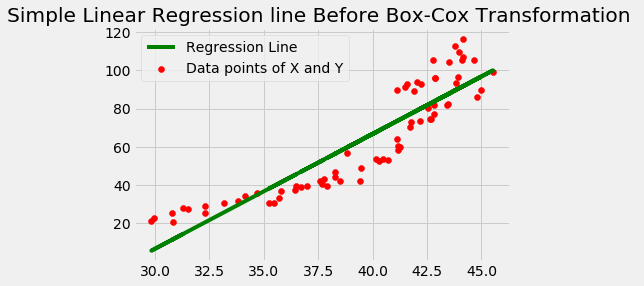

In [ ]:
#interception line

#use regplot

plt.style.use('fivethirtyeight')
plt.scatter(X, Y, color = 'red',label="Data points of X and Y")
plt.plot(X,Y_pred, color = 'green',label="Regression Line")
plt.legend()
plt.title("Simple Linear Regression line Before Box-Cox Transformation ")


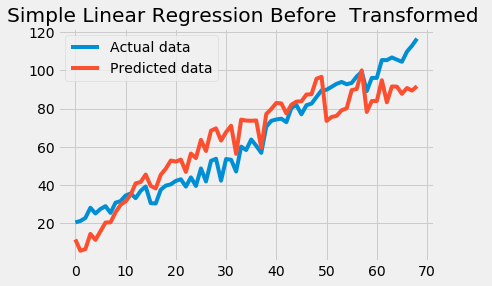

In [ ]:
plt.style.use('_classic_test_patch')
plt.plot(Y,label="Actual data")
plt.plot(Y_pred,label="Predicted data")
plt.title("Simple Linear Regression Before  Transformed ")
plt.legend()

In [ ]:
#Calculation the Model Performance for Linear Regression

#R_Squared
r2_score=reg.score(X, Y)
print(f"R Square:  {r2_score}")


from sklearn.metrics import r2_score
r2 = r2_score(Y, Y_pred)
print('r2 score for perfect model is', r2)

#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error:  {mse}")


#Root mean square error
rmse=np.sqrt(mse)
print(f"Root mean square error:  {rmse}")


#Mean Absolute Error
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(Y, Y_pred)
print(f"Mean Absolute Error:  {mae}")

#Mean Absolute Percentage  Error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

LR_MAPE= MAPE(Y, Y_pred)
print("Mean Absolute Percentage Error: ",LR_MAPE)

#Teil's U Statistic
def u1(f,y):
    # y = y.reset_index(drop=True).values.flatten()
    # f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i':f, 'y_i': y})
    df['(f_i - y_i)^2'] = np.square(df['f_i'] - df['y_i'])
    df['y_i^2'] = np.square(df['y_i'])
    df['f_i^2'] = np.square(df['f_i'])
    return (np.sqrt(np.mean(df['(f_i - y_i)^2'])))/(np.sqrt(np.mean(df['y_i^2']))+np.sqrt(np.mean(df['f_i^2'])))

U1= u1(Y_pred,Y)
print("Theil's U1 Statistic: ",U1)

def u2(f,y):
    # y = y.reset_index(drop=True).values.flatten()
    # f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i+1':f, 'y_i+1': y})
    df['y_i'] = df['y_i+1'].shift(periods=1)
    df['numerator'] = np.square((df['f_i+1'] - df['y_i+1']) / df['y_i'])
    df['denominator'] = np.square((df['y_i+1'] - df['y_i']) / df['y_i'])
    df.dropna(inplace=True)
    return np.sqrt(np.sum(df['numerator'])/np.sum(df['denominator']))

U2= u2(Y_pred,Y)
print("Theil's U2 Statistic: ",U2)




R Square:  0.8180514145006739
r2 score for perfect model is 0.8180514145006739
Mean Squared Error:  146.31694215040858
Root mean square error:  12.09615402309381
Mean Absolute Error:  10.756380287527183
Mean Absolute Percentage Error:  20.755592458891766
Theil's U1 Statistic:  0.08792808942922352
Theil's U2 Statistic:  2.399210076306699


# **Bayesian Regression**

In [ ]:
X_bb=X
Y_bb=Y

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split

# cannot use Rank 1 matrix in scikit learn
X=X.reshape((m ,1))

# Splitting dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30,random_state=42)
# Creating and training model

model = BayesianRidge()
model.fit(X_bb, Y_bb)
   
# Model making a prediction on test data
prediction = model.predict(X_bb)
print("Y_Predicted Values : ")
print(prediction)
# print(Y_bb)

Y_Predicted Values : 
[11.83845273  5.98328241  6.81973531 14.70629126 11.59946619 16.08046388
 20.62120821 20.74070149 25.93865881 29.82219015 31.67433586 35.02014747
 40.99481106 41.7117707  45.59530203 39.68038507 38.36595908 45.47580876
 48.64238046 52.88439161 52.34667189 53.3623647  46.96947466 56.5289364
 54.13907097 63.63878608 57.8433624  68.41851695 69.61344967 63.28030626
 67.64181069 70.9876223  56.3496965  74.154194   73.67622092 73.55672764
 73.73596755 59.63576147 77.08177916 79.71063114 82.81745621 82.57846967
 77.38051234 81.92125667 83.53441584 83.71365575 87.23870727 87.35820054
 95.42399639 96.4396892  73.49698101 75.52836663 76.12583299 79.05341815
 80.00936432 89.50907944 90.1065458  99.78550082 78.15721861 83.83314902
 83.83314902 94.64729013 83.17593603 91.42097179 91.30147851 87.59718709
 90.58451888 89.27009289 91.54046506]


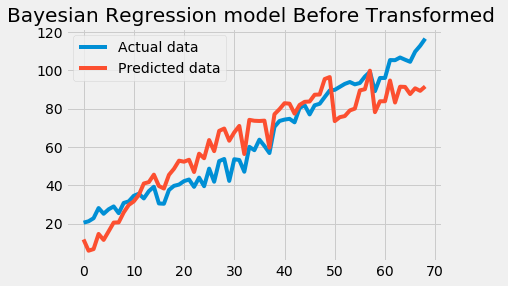

In [ ]:
plt.style.use('_classic_test_patch')
plt.plot(Y_bb,label="Actual data")
plt.plot(prediction,label="Predicted data")
plt.title("Bayesian Regression model Before Transformed ")
plt.legend()

In [ ]:
#Calculation the Model Performance for Bayesian Regression

#R_Squared

from sklearn.metrics import r2_score
r2 = r2_score(Y_bb, prediction)
print('r2 score for perfect model is', r2)

#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_bb, prediction)
print(f"Mean Squared Error:  {mse}")


#Root mean square error
rmse=np.sqrt(mse)
print(f"Root mean square error:  {rmse}")


#Mean Absolute Error
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(Y_bb, prediction)
print(f"Mean Absolute Error:  {mae}")

#Mean Absolute Percentage  Error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

LR_MAPE= MAPE(Y_bb, prediction)
print("Mean Absolute Percentage Error: ",LR_MAPE)

#Teil's U Statistic
def u1(f,y):
    # y = y.reset_index(drop=True).values.flatten()
    # f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i':f, 'y_i': y})
    df['(f_i - y_i)^2'] = np.square(df['f_i'] - df['y_i'])
    df['y_i^2'] = np.square(df['y_i'])
    df['f_i^2'] = np.square(df['f_i'])
    return (np.sqrt(np.mean(df['(f_i - y_i)^2'])))/(np.sqrt(np.mean(df['y_i^2']))+np.sqrt(np.mean(df['f_i^2'])))

U1= u1(prediction,Y_bb)
print("Theil's U1 Statistic: ",U1)

def u2(f,y):
    # y = y.reset_index(drop=True).values.flatten()
    # f = f.reset_index(drop=True).values.flatten()
    df = pd.DataFrame({'f_i+1':f, 'y_i+1': y})
    df['y_i'] = df['y_i+1'].shift(periods=1)
    df['numerator'] = np.square((df['f_i+1'] - df['y_i+1']) / df['y_i'])
    df['denominator'] = np.square((df['y_i+1'] - df['y_i']) / df['y_i'])
    df.dropna(inplace=True)
    return np.sqrt(np.sum(df['numerator'])/np.sum(df['denominator']))

U2= u2(prediction,Y_bb)
print("Theil's U2 Statistic: ",U2)

r2 score for perfect model is 0.8180426626345269
Mean Squared Error:  146.32398010725348
Root mean square error:  12.096444936726389
Mean Absolute Error:  10.743304952673538
Mean Absolute Percentage Error:  20.683842897464494
Theil's U1 Statistic:  0.08795033090932321
Theil's U2 Statistic:  2.3871550477346215
